#Importing Necessary libraries

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import gdown
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Downloading and loading the dataset

In [2]:

url = 'https://docs.google.com/spreadsheets/d/1R7PVfuW7UcNB6i2mRCEmc0ILnvLo_5qj/edit?usp=share_link'
file_id = url.split('/')[-2]
download_link = 'https://drive.google.com/uc?/export=download&id=' + file_id
gdown.download(download_link)

Downloading...
From: https://drive.google.com/uc?/export=download&id=1R7PVfuW7UcNB6i2mRCEmc0ILnvLo_5qj
To: /content/transact_train t.xlsx
100%|██████████| 48.2M/48.2M [00:01<00:00, 30.6MB/s]


'transact_train t.xlsx'

In [3]:
#Loading the datsset
data=pd.read_excel("/content/transact_train t.xlsx")

#Performing EDA

In [5]:
data.shape

(429013, 24)

In [6]:
data.describe()

,sessionNo,startHour,startWeekday,duration,cCount,bCount
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,4.135168
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,4.451778
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,1.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,3.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,5.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,108.000000


In [7]:
data.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


In [8]:
data.tail()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
429008,49998,18,7,5988.882,77,9.99,149.99,5253.28,3,49.95,...,?,?,?,?,?,?,?,?,?,n
429009,49999,18,7,675.114,6,59,199.99,509.96,1,89.99,...,?,25038,?,?,?,0,24,1,4,n
429010,49999,18,7,715.341,7,59,649.99,1159.95,1,89.99,...,completely orderable,25038,?,?,?,0,24,1,4,n
429011,50000,18,7,0.000,1,6.99,6.99,6.99,1,6.99,...,?,47,300,537,5,0,53,1,34,n
429012,50000,18,7,82.943,1,6.99,6.99,6.99,1,6.99,...,completely orderable,47,300,537,5,0,53,1,34,n


## Data-Pre processing

In [9]:
data.set_index("sessionNo",inplace=True) #unnecessary column is removed

In [10]:
data.replace('?', pd.np.nan, inplace=True)
data.to_csv('updated_dataset.csv', index=False) # Replacing the unnecessary values like '?'in dataset with nan to identify and then handle missing values accordingly.

<ipython-input-10-890a74f7bd43>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.replace('?', pd.np.nan, inplace=True)


In [11]:
data.head() #View data after above changes

,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
sessionNo,,,,,,,,,,,,,,,,,,,,,
1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


In [12]:
data.isna().sum()#Checking the count of missing values

startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice            2765
cMaxPrice            2765
cSumPrice            2765
bCount                  0
bMinPrice            5130
bMaxPrice            5130
bSumPrice            5130
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal             153740
customerScore      153740
accountLifetime    153740
payments           151098
age                151396
address            151098
lastOrder          151098
order                   0
dtype: int64

In [13]:
#Filling the related missing values with median and updating
cMinPrice_median = data['cMinPrice'].median()
data['cMinPrice'].fillna(cMinPrice_median,inplace=True)
cMaxPrice_median = data['cMaxPrice'].median()
data['cMaxPrice'].fillna(cMaxPrice_median, inplace=True)
cSumPrice_median = data['cSumPrice'].median()
data['cSumPrice'].fillna(cSumPrice_median, inplace=True)
bMinPrice_median = data['bMinPrice'].median()
data['bMinPrice'].fillna(bMinPrice_median,inplace=True)
bMaxPrice_median = data['bMaxPrice'].median()
data['bMaxPrice'].fillna(bMaxPrice_median, inplace=True)
bSumPrice_median = data['bSumPrice'].median()
data['bSumPrice'].fillna(bSumPrice_median, inplace=True)

In [14]:
#interpolate() and mode are used to update the missing values as per the dataset analysis
data['accountLifetime']=data['accountLifetime'].interpolate()
data['payments']=data['payments'].interpolate()
data['age']=data['age'].interpolate()
data['address']=data['address'].interpolate()
data['lastOrder']=data['lastOrder'].interpolate()
data.update(data[['accountLifetime', 'payments','age','address','lastOrder']])
data['bStep']=data['bStep'].interpolate()
data['customerNo']=data['customerNo'].interpolate()
data['maxVal']=data['maxVal'].interpolate()
data['customerScore']=data['customerScore'].interpolate()
data.update(data[['bStep', 'customerNo','maxVal','customerScore']])
data['cMinPrice']=data['cMinPrice'].interpolate()
data['cMaxPrice']=data['cMaxPrice'].interpolate()
data['cSumPrice']=data['cSumPrice'].interpolate()
data['bMinPrice']=data['bMinPrice'].interpolate()
data['bMaxPrice']=data['bMaxPrice'].interpolate()
data['bSumPrice']=data['bSumPrice'].interpolate()
bStep_mode = data['bStep'].mode()[0]
data['bStep'].fillna(bStep_mode, inplace=True)


In [17]:
variables=['startHour','duration','cCount', 'cMinPrice',
       'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice', 'bMaxPrice',
       'bSumPrice','bStep','onlineStatus','maxVal', 'customerScore','accountLifetime', 'payments'
       ,'age','lastOrder']

<ipython-input-18-fcc94bb76b4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data[variables].corr()


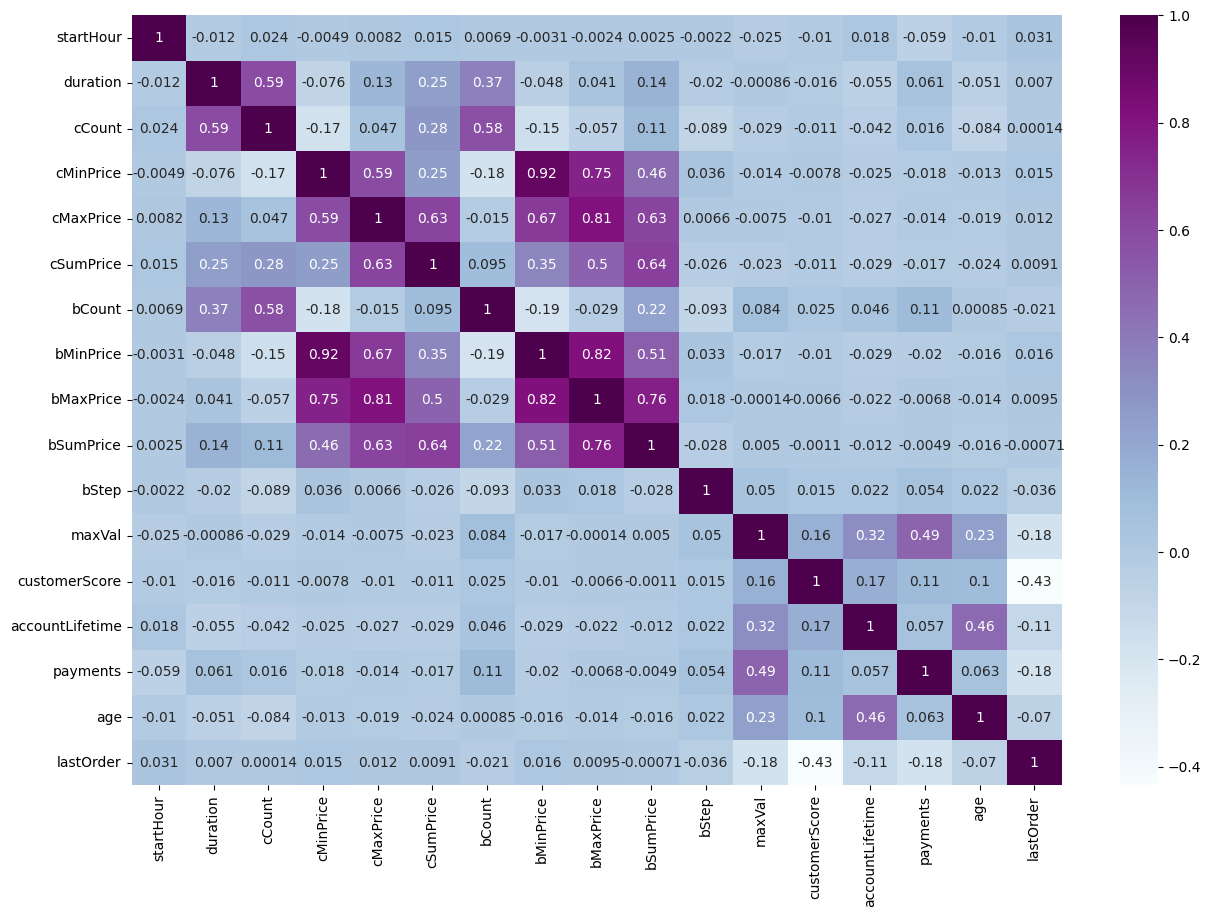

In [18]:
corr_matrix=data[variables].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,cmap="BuPu", annot=True,ax=ax)
plt.show()

In [19]:
#LabelEncoder is used to transform the categorical values in independant features and one-hot encoding is used for dependant categorical values
encoder=LabelEncoder()
data['availability']=encoder.fit_transform(data['availability'])
data['onlineStatus']=encoder.fit_transform(data['onlineStatus'])
data['order']=encoder.fit_transform(data['order'])

In [20]:
data.isna().sum() #View data after above changes

startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
customerNo         0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64

##Data Visualisation

In [ ]:
#Graphical Representation of the important features to see the variations in the dataset

In [42]:
data.corr()['order']

startHour          0.041708
startWeekday       0.043388
duration           0.049930
cCount             0.104753
cMinPrice         -0.132845
cMaxPrice         -0.101071
cSumPrice         -0.048440
bCount             0.176186
bMinPrice         -0.141703
bMaxPrice         -0.116891
bSumPrice         -0.064450
bStep              0.100097
onlineStatus      -0.082232
availability      -0.110269
customerNo         0.070216
maxVal             0.055693
customerScore      0.020168
accountLifetime    0.066199
payments           0.042733
age                0.029182
address            0.044019
lastOrder         -0.000650
order              1.000000
Name: order, dtype: float64

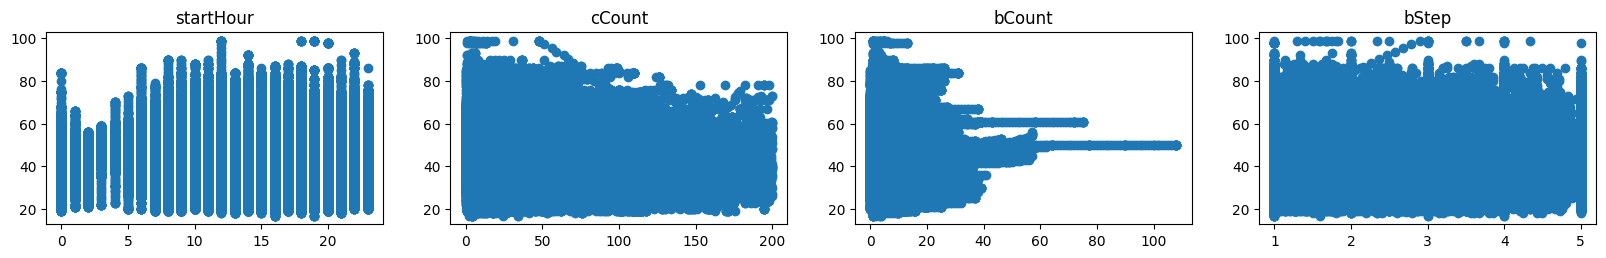

In [43]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, figsize=(20,2.5))

ax1.scatter(data['startHour'], data['age'])
ax1.set_title("startHour")
ax2.scatter(data['cCount'], data['age'])
ax2.set_title("cCount")
ax3.scatter(data['bCount'], data['age'])
ax3.set_title("bCount")
ax4.scatter(data['bStep'], data['age'])
ax4.set_title("bStep")

plt.show()

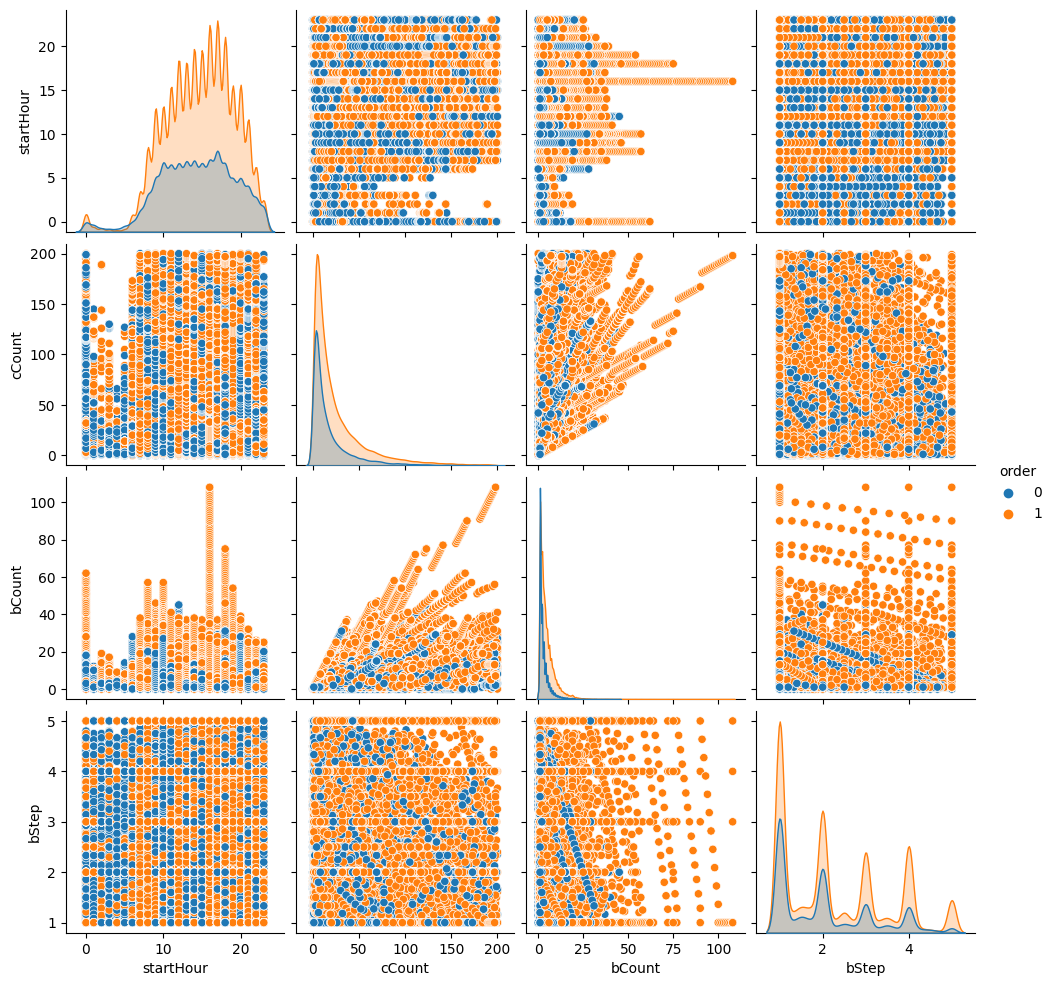

In [44]:
sns.pairplot(data=data,vars=['startHour','cCount','bCount', 'bStep'],hue='order',palette='tab10')
plt.show()

<ipython-input-47-40b08c98e1b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['accountLifetime'])


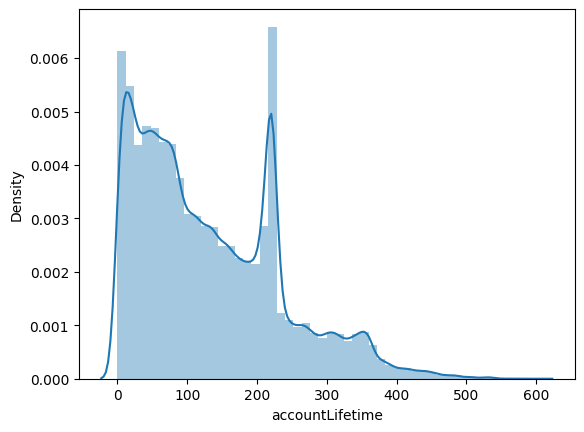

In [47]:
sns.distplot(data['accountLifetime'])
plt.show()

<ipython-input-48-702115779efb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['customerScore'])


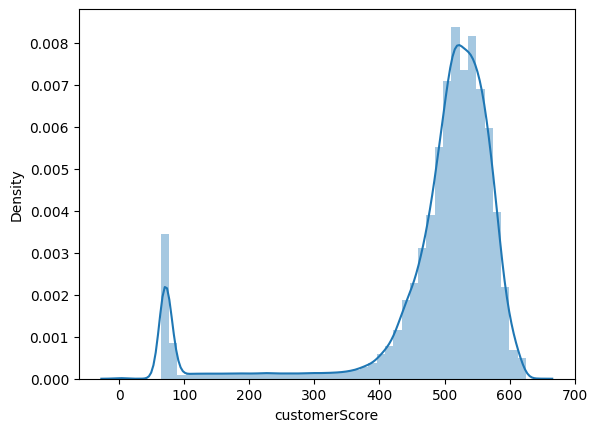

In [48]:
sns.distplot(data['customerScore'])
plt.show()

<ipython-input-49-dbfeb16865c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


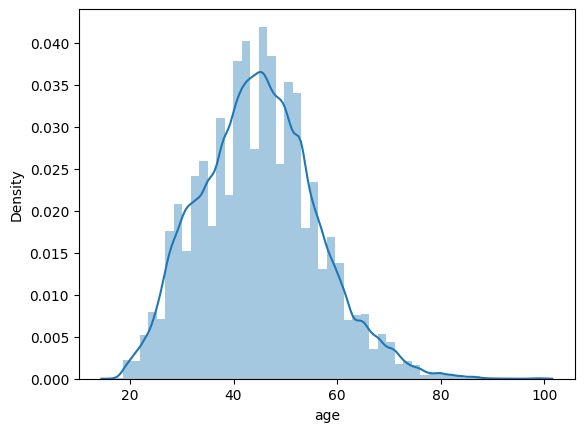

In [49]:
sns.distplot(data['age'])
plt.show()

<ipython-input-50-507c704df24e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['lastOrder'])


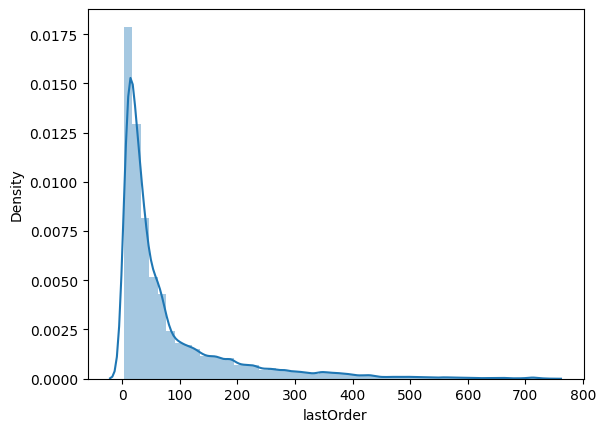

In [50]:
sns.distplot(data['lastOrder'])
plt.show()

<ipython-input-51-090193969211>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['payments'])


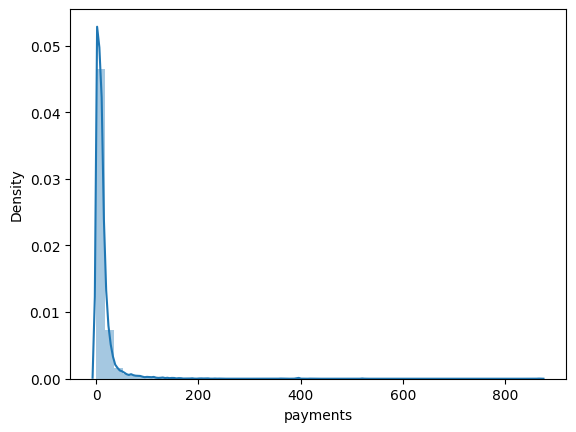

In [51]:
sns.distplot(data['payments'])
plt.show()

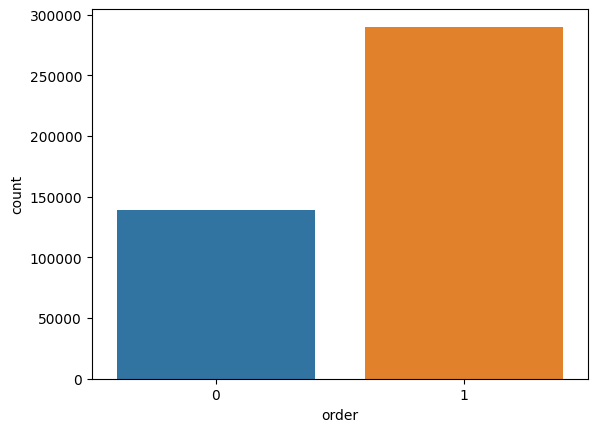

In [53]:
sns.countplot(x='order',data=data)
plt.show()

## Model Trainning & Implementation


*   DecisionTreeClassifier
*   LogisticRegression
*   GradientBoostingClassifier
*   KNeighborsClassifier
*   RandomForestClassifier

Please note that models execution might take some time


In [ ]:
x = data[['startHour','payments','bCount','bStep', 'duration','cCount',
          'cMinPrice','cMaxPrice','cSumPrice','bMinPrice','bMaxPrice',
          'bSumPrice','onlineStatus','maxVal','customerScore','accountLifetime',
          'age','lastOrder']]
y = data['order']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

#DecisionTree

In [ ]:
DT = DecisionTreeClassifier(max_depth=50, min_samples_split=3)

DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50, min_samples_split=3)

In [ ]:
y_pred = DT.predict(x_test)
y_true = data.order

In [ ]:
# Results
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy : ",acc)
precision = precision_score(y_test, y_pred)*100
print("precision_score : ",precision)
recall = recall_score(y_test, y_pred)*100
print("recall_score : ",recall)
f1 = f1_score(y_test, y_pred)*100
print("f1_score : ",f1)
auc = roc_auc_score(y_test, y_pred)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy :  85.65079562406763
precision_score :  89.25554382259767
recall_score :  89.51651893634165
f1_score :  89.3858408910652


##LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Results
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy : ",acc)
precision = precision_score(y_test, y_pred)*100
print("precision_score : ",precision)
recall = recall_score(y_test, y_pred)*100
print("recall_score : ",recall)
f1 = f1_score(y_test, y_pred)*100
print("f1_score : ",f1)
auc = roc_auc_score(y_test, y_pred)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


Accuracy :  68.14330501264524
precision_score :  68.63705414109498
recall_score :  97.3674683216964
f1_score :  80.51607384703115


##GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.set_params(learning_rate=0.8, n_estimators=110, max_depth=5)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)

In [ ]:
# Results
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy : ",acc)
precision = precision_score(y_test, y_pred)*100
print("precision_score : ",precision)
recall = recall_score(y_test, y_pred)*100
print("recall_score : ",recall)
f1 = f1_score(y_test, y_pred)*100
print("f1_score : ",f1)
auc = roc_auc_score(y_test, y_pred)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy :  80.41793410486812
precision_score :  82.23870553808116
recall_score :  90.6008102749763
f1_score :  86.21747547330774


##KNeighborsClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
# Results
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy : ",acc)
precision = precision_score(y_test, y_pred)*100
print("precision_score : ",precision)
recall = recall_score(y_test, y_pred)*100
print("recall_score : ",recall)
f1 = f1_score(y_test, y_pred)*100
print("f1_score : ",f1)
auc = roc_auc_score(y_test, y_pred)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy :  83.16259338251577
precision_score :  85.39919381054548
recall_score :  90.5801224032411
f1_score :  87.9133934024379


##RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=450, max_depth=50, min_samples_split=20)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 88.77428528140042


In [ ]:
# Results
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy : ",acc)
precision = precision_score(y_test, y_pred)*100
print("precision_score : ",precision)
recall = recall_score(y_test, y_pred)*100
print("recall_score : ",recall)
f1 = f1_score(y_test, y_pred)*100
print("f1_score : ",f1)
auc = roc_auc_score(y_test, y_pred)*100
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy :  88.77428528140042
precision_score :  88.36265008644345
recall_score :  96.04344453064391
f1_score :  92.04308892046394


## Exporting the Model for Deployment

In [ ]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(rf,open('rf.pkl','wb'))

In [ ]:
data.shape

(429013, 23)

In [ ]:
x_train

,startHour,payments,bCount,bStep,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bMinPrice,bMaxPrice,bSumPrice,onlineStatus,maxVal,customerScore,accountLifetime,age,lastOrder
sessionNo,,,,,,,,,,,,,,,,,,
19950,9,5.705882,1,3.000000,1675.334,18,9.95,149.99,607.78,149.99,149.99,149.99,1,1200.0,488.764706,215.470588,45.000000,61.764706
39780,11,57.000000,9,1.000000,2652.682,65,1.00,69.99,836.23,1.00,29.99,88.97,2,2400.0,464.000000,50.000000,33.000000,8.000000
19771,9,7.300000,1,1.000000,659.182,15,8.39,24.99,209.85,14.99,14.99,14.99,1,780.0,521.900000,190.700000,45.200000,29.500000
38129,9,2.000000,2,3.666667,34.335,6,59.95,59.95,359.70,59.95,59.95,119.90,2,1700.0,70.000000,132.000000,47.000000,326.000000
40832,11,45.000000,5,3.000000,1290.405,33,4.00,49.99,501.82,4.00,29.99,66.98,1,3700.0,536.000000,159.000000,57.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19030,7,1.000000,1,1.500000,15.304,2,129.99,129.99,259.98,129.99,129.99,129.99,2,300.0,586.000000,5.000000,32.000000,164.000000
9050,15,41.166667,1,2.000000,881.945,7,8.99,14.99,82.94,14.99,14.99,14.99,1,1250.0,427.500000,50.500000,30.833333,18.000000
24260,14,16.000000,3,2.750000,380.260,9,19.99,59.99,268.91,19.99,59.99,102.97,2,4000.0,547.000000,190.000000,42.000000,12.000000


In [ ]:
startHour,onlineStatus,customerScore,age,lastOrder

In [ ]:
y_train

sessionNo
19950    1
39780    1
19771    0
38129    1
40832    0
        ..
19030    1
9050     0
24260    1
46725    1
19994    1
Name: order, Length: 343210, dtype: int64